# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

Start project by exploring the data a bit. Check for missing values and outliners(boxplot). 

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats

In [4]:
np.random.seed(24)

In [5]:
# Your work here.
df.head()


,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 3.1+ KB


In [8]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [9]:
df.temperature.median()

98.3

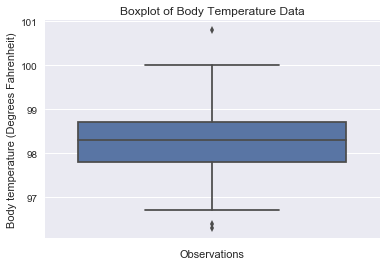

In [10]:
sns.set()
sns.boxplot(x=df.temperature, data=df,orient='v')

# Label the axes
plt.xlabel('Observations')
plt.ylabel('Body temperature (Degrees Fahrenheit)')
plt.title("Boxplot of Body Temperature Data")
# Show the plot
plt.show()

The data had no missing values. There were three outliers. We will leave these in the data set for the time. The mean 98.25 appears to be below the accepted human body temperature, which we will explore.

Next we will plot the histogram of observations to see if it appears to resemble a Normal (Gaussian) Distribution. We know bins size affect interpretation of histograms so we will plot one at 100 bins and one at the accepted rule of thumb (square root of data points). We will go ahead and normalize as well.
Finally, we will also look at he Empirical Cumulative Distribution Function


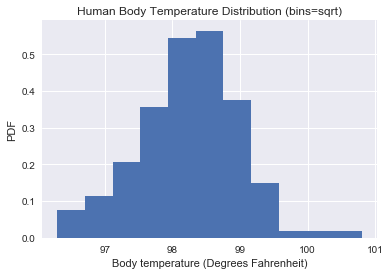

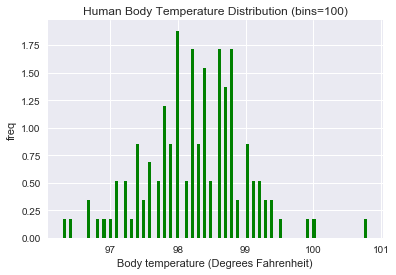

In [134]:
sns.set()
n_data=len(df.temperature)

# Number of bins is the square root of number of data points: n_bins
n_bins=np.sqrt(n_data)
n_bins=int(n_bins)

# Plot the histogram
_= plt.hist(x=df.temperature,bins=n_bins,normed=True)
_= plt.xlabel('Body temperature (Degrees Fahrenheit)')
_= plt.ylabel('PDF')
_= plt.title('Human Body Temperature Distribution (bins=sqrt)')
plt.show()
_= plt.hist(df.temperature,bins=100,density=True,color='green')
_= plt.xlabel('Body temperature (Degrees Fahrenheit)')
_= plt.ylabel('Freq')
_= plt.title('Human Body Temperature Distribution (bins=100)')
 #Show histogram
plt.show()


In [20]:
#code developed with datacamp class
def ecdf(data):
    """ Compute Empirical Cumulative Distribution Functions for an array of 1 dimensional elements
    """
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.linspace(1./n,1,n)
    return x,y

In [25]:
#save mean and standard devia
mu=np.mean(df.temperature)
sigma=np.std(df.temperature)
n=len(df.temperature)
print(mu,sigma)

(98.24923076923078, 0.7303577789050377)


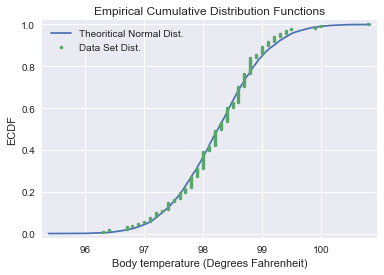

In [26]:
# plot data distribution against a similiar normal distribution

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu,sigma,size=10000)

# Get the CDF of the samples and of the data
x_theory , y_theory = ecdf(samples)
x , y = ecdf(df.temperature)


# Plot the CDFs and show the plot
sns.set()
_ = plt.plot(x_theory, y_theory,label='Theoritical Normal Dist.')
_ = plt.plot(x, y, marker='.', linestyle='none',label='Data Set Dist.')

plt.margins(0.02)

_ = plt.xlabel('Body temperature (Degrees Fahrenheit)')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc=2)
_ = plt.title('Empirical Cumulative Distribution Functions')

plt.show()


We see that the data approximates a Normal Cumulative Distribution very closely. We will verify with a probability plot and permutation mix of ecdfs.

Below we use Scipy to calculate quantiles for a probability plot. Generate a probability plot of our data against the quantiles of the normal distribution and a best-fit line for the data.


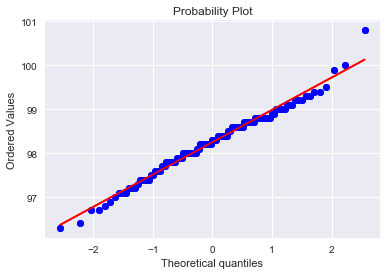

In [42]:
#make probability plot
stats.probplot(x,plot=plt)
plt.show()

We see that a linear line fits are data very closely.

Now a permutation sampling to see how their ECDFs would look if they were identically distributed. Notice that the permutation sampled ECDFs overlap and give a purple haze. Most of the ECDFs from the permutation samples overlap with the observed data, suggesting that the human temperature data set can be assumed to be Normally Distributed. (More accurately, we have no reason to reject the hypothesis that they are Normally Distributed.)

In [44]:
#function developed during datacamp class
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


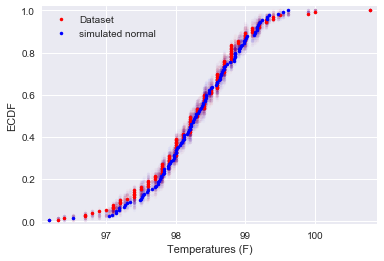

In [45]:
#generate a similar sized normal sample for comparison
samples_1 = np.random.normal(mu,sigma,size=130)

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(df.temperature, samples_1)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_2, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(df.temperature)
x_2, y_2 = ecdf(samples_1)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red', label='Dataset')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label='simulated normal')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('Temperatures (F)')
_ = plt.ylabel('ECDF')
_ = plt.legend(loc=2)
plt.show()

## To answer the question:
## 1.) Is the distribution of body temperatures normal?
Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.

In reality this is a bad question. No, Human Body Temperatures are not normally distributed. Normal Distribution have a range negative infinite to positive infinity. However, we could consider this set to be approximately normally distributed. This is what we want anyway. Therefore, yes. The Normal Distribution can reasonable be used to approximate this dataset. 

## 2.)Is the sample size large? Are the observations independent?
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.

We are making some assumption here. First, that the samples (dataset provided) is representative of the population, all human beings. We are also assuming that the observations were drawn randomly, hence independently. There is no reason to believe that knowledge of one observation (patient's temperature) should provide any knowledge in predicting the temperature of the next observation (patients's temperature). Patient A's temperature should have no affect on patient B's temperature. Hence, we can assume that each observation is an independent event. 

Sample size is normally dependent on what type of statistics we want to us. A rule of thumb is that observations of  size 30 or more will ensure convergence in the CLT. A student's T-Test should be used for samples less than 30.

We can check what size the z-test needs in order to be reliable.

In [130]:
z_critical90 = stats.norm.ppf(.90) # finds score based of of desired confidence 90% 
z_critical95 = stats.norm.ppf(.95) # finds score based of of desired confidence 95% 
z_critical99 = stats.norm.ppf(.99) # finds score based of of desired confidence 99% 
print(z_critical90,z_critical95,z_critical99 )

(1.2815515655446004, 1.6448536269514722, 2.3263478740408408)


In [131]:
#sample size needed for use of a z-test (with 90% confidence):
#z-score(for confidence interval) squared times standard dev times 1 minus std divided by margin of error squared
sample_size_needed_90_conf=(1.28**2)*(sigma*(1-sigma))/(0.05**2)
sample_size_needed_90_conf

129.06351407788046

In [132]:
#sample size needed for use of a z-test (with 95% confidence):
#z-score(for confidence interval) squared times standard dev times 1 minus std divided by margin of error squared
sample_size_needed_95_conf=(1.645**2)*(sigma*(1-sigma))/(.05**2)
sample_size_needed_95_conf

213.16473125158475

In [133]:
#sample size needed for use of a z-test (with 99% confidence):
#z-score(for confidence interval) squared times standard dev times 1 minus std divided by margin of error squared
sample_size_needed_99_conf=(2.23**2)*(sigma*(1-sigma))/(.05**2)
sample_size_needed_99_conf

391.73580881218976

The sample provided is large enough to use a standard z- critical value for 90% confidence. Otherwise a t-test should satisfiy.

## 3.) Is the true population mean really 98.6 degrees F?
Would you use a one-sample or two-sample test? Why?
In this situation, is it appropriate to use the  t
  or  z
  statistic?
Now try using the other test. How is the result be different? Why?

We do not have the original data used to establish the 98.6(F) standard. We only have the mean of 98.6(F), therefore, a one-sample test would be best suited to test the hypothesis. I would recommend using the t-test, since we know that the z-test is not best suited for confidence levels above 90% due to sample size. The t-test is almost always used anyway since it is know to work for larger samples as well as smaller samples. 


If 98.6 (F) is the mean of human body temperature then our data set of temperature should have a mean near 98.6. First lets look at assuming our data set does have a mean at 98.6

Null Hypothesis: 98.6 (F) is equal to the mean of our data set df.temperature

Alt Hypothesis: 98.6 (F) is not the true of our data set df.temperature

Assumption: A significance level of 0.05 or 95%


In [51]:
#functions developed during datacamp course
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates

In [55]:
# bootstrap one sample test

# We shift both sets to have the same mean. This allows us to  simulate the hypothesis that their means are equal. 
shifted_temperature = df.temperature - np.mean(df.temperature) + 98.6

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_ = draw_bs_reps(shifted_temperature, np.mean, 10000)

# Compute and print p-value: p
p = np.sum(bs_replicates_<=np.mean(df.temperature)) / float(len(bs_replicates_))
print('p-value =', p)


('p-value =', 0.0)


('95% confidence interval =', array([ 98.47461538,  98.72846154]), 'shifted_means')


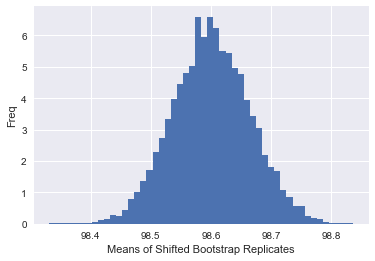

In [58]:
# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates_,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'shifted_means')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates_, bins=50, normed=True)
_ = plt.xlabel(r'Means of Shifted Bootstrap Replicates')
_ = plt.ylabel('Freq')

# Show the plot
plt.show()


The low p-value suggests that the null hypothesis, 98.6 (F) is equal to the mean of our data set df.temperature,  is false. None of the shifted means were as extreme or more extreme than our original mean. This is concerning. It appears that our sample is far away from the assumed true mean of 98.6.In fact notice below that we are not even close to the 95% confidence level for accepting the null hypothesis.  

Now since we assumed are distribution was approximately normal, then 68% of the means should fall within 1 standard deviation, 95% with in 2 standard deviation, and 99 percent within 3 standard deviations. As you can see from the histogram, 98.25, the mean for are sample is way off in the right tail. This strongly suggests that 98.6 is not the true mean of human body temperatures. 

 Another look:
 Assuming the observations are identically  distributed from a normal distribution with 98.6 mean, and standard deviation of 1, the sample mean, mu, and sample standard deviation, sigma. We can use a one sample z or t. 

In [59]:
#recall the sample mean and standard deviation
print(mu,sigma)

(98.24923076923078, 0.7303577789050377)


In [60]:
#calculates z table value 
def z_number(pop_mean,pop_var,sample_mean,sample_var,number_of_samples):
    """calculates a z table number and returns"""
    z_num=(sample_mean-pop_mean)/(pop_var/np.sqrt(number_of_samples))
    return z_num

In [61]:
#calculates p value of sample mean compared to a population mean of 98.6
stats.norm.cdf(z_number(98.6,1,mu,sigma,130))

3.1753706687449843e-05

In [63]:
#calculates one sample t test of data set compared to assumed 98.6 mean returns t table value and p value 
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

Once again, we see that both the one sample t and z test give extremely low p values, strongly suggesting that 98.6 is not the mean for the population of human body temperatures. We see that the values are different. The z score gives a much larger p-value so it is less confident in the rejection of the null hypothesis, that the samples have the same mean. This is due to the error caused by the limited sample size. We should be more comfortable with the result from the t test, which is a stronger rejection of the null hypothesis.

Next we will look at confidence intervals.


The confidence interval for 95% confidence from our sample is the mean of our sample plus or minus 1.65 the standard deviation of the population 

In [64]:
z_critical=stats.norm.ppf(.95)
z_critical

1.6448536269514722

In [65]:
left_interval_z=mu-(z_critical * (1/np.sqrt(130)))
right_interval_z=mu+(z_critical * (1/np.sqrt(130)))
print"[",left_interval_z,right_interval_z,"]", "95% CI"

[ 98.1049675628 98.3934939756 ] 95% CI


The confidence interval based of the z-score doesn't include 98.6 (F). 

In [66]:
# Get the t-critical value* 
t_critical = stats.t.ppf(q = 0.95, df=129) 
t_critical

1.6567515939762396

In [67]:
left_interval_t = mu-(t_critical*(sigma/np.sqrt(130)))
right_interval_t = mu+(t_critical*(sigma/np.sqrt(130)))
print"[",left_interval_t,right_interval_t,"]", "95% CI"

[ 98.1431048707 98.3553566677 ] 95% CI


Here we see a much better answer. The 98.6 doesn't even fall into the 95% or the 99%! 

In [68]:
t_critical = stats.t.ppf(q = 0.99, df=129) 
left_interval_t = mu-(t_critical*(sigma/np.sqrt(130)))
right_interval_t = mu+(t_critical*(sigma/np.sqrt(130)))
print"[",left_interval_t,right_interval_t,"]", "99% CI"

[ 98.0983388609 98.4001226775 ] 99% CI


The t distribution is better here. It is designed for smaller samples n<30 but approximates a normal distribution for larger samples. It also does not require us to known the true population standard deviation, which we actually do not know. We use the data standard deviation instead. Therefore, we can reason that the z statistic above gives us an error prone confidence interval. The t statistic gives us a much more accurate confidence  interval, and one that makes us seriously suspect that 98.6 (F) is the wrong mean for human body temperatures.

We could also do this with bootstraping by generating 10,000 replicates of our data set, taking the mean of all the replicates, comparing how many are 98.6(F) or greater, and finding the confidence interval of the replicates.

('p-value =', 0)
('95% confidence interval =', array([ 98.12613462,  98.37463462]), 'replicates of our data set')


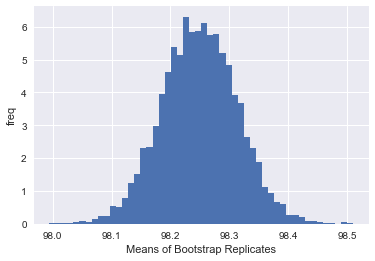

In [112]:
# Compute 10,000 bootstrap replicates from df.temperatures
bs_replicates_mean = draw_bs_reps(df.temperature, np.mean, 10000)

# Compute and print p-value: p
p = np.sum(bs_replicates_mean>=98.6) / len(bs_replicates_mean)
print('p-value =', p)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates_mean,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'replicates of our data set')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates_mean, bins=50, normed=True)
_ = plt.xlabel('Means of Bootstrap Replicates')
_ = plt.ylabel('Freq')

# Show the plot
plt.show()


We get almost exactly what are t statistic above calculated. The difference between the t test and the bootstrap being the variance of sampling in bootstrapping.

To do the two-sample bootstrap test, we need a sample to test against. We will generate a generic sample from a normal distribution with 98.6 as the mean, variance the same as our data, and 130 data points. Once again we shift both sets to have the same mean. This allows us to  simulate the hypothesis that their means are equal. We then draw bootstrap samples out of the shifted sets and compute the difference in means. We draw several bootstrap replicate. The p-value is the fraction of replicates with a difference in means less than or equal to what was observed.

In [79]:
#two sample bootstrap test
# generate a sample from the normal distribution to test data against
norm_sample=np.random.normal(98.6,sigma,130)
norm_sample=pd.Series(norm_sample)

#find empiriacal difference of means from data and sample
empirical_diff_means = np.mean(df.temperature) - np.mean(norm_sample)

#join data together and find combined mean
temperatures=df.temperature
forces_concat=temperatures.append(norm_sample)
mean_force = np.mean(forces_concat)

# Generate shifted arrays
norm_sample_shifted = norm_sample - np.mean(norm_sample) + mean_force
df_temperature_shifted = df.temperature - np.mean(df.temperature) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(norm_sample_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(df_temperature_shifted, np.mean,10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates<=empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)


('p-value =', 0.0)


Once again the p value is extremely small, thus we have to reject the hyopthesis that the mean are in fact the same. 

## 4.)Draw a small sample of size 10 from the data and repeat both tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the  t and  z statistic?

One sample tests will be the best since we do not have the actual test that established the 98.6 (f) standard. We will sample from our data-set 10 points and calculate a new mean. We then draw bootstrap samples of the small sample set and compute their means. These means are then used as bootstrap replicates. The p-value is the fraction of replicates with a difference in means less than or equal to what was observed.

('p-value =', 0.0104)
('95% confidence interval =', array([ 98.14   ,  99.05025]), 'for a small set')
('small sample mean=', 98.07)


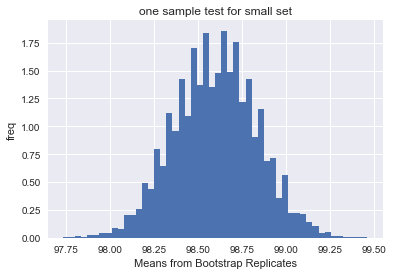

In [110]:
# one sample bootstrap test
# generate a sample from the data of size 10
small_sample=np.random.choice(df.temperature,size=10)
small_sample=pd.Series(small_sample)

# We shift our set to have the assumed population mean of 98.6. 
#This allows us to  simulate the hypothesis that their means are equal. 
small_shifted_temperature = small_sample - np.mean(small_sample) + 98.6

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_ = draw_bs_reps(small_shifted_temperature, np.mean, 10000)

# Compute and print p-value: p
p = np.sum(bs_replicates_<=np.mean(small_sample)) / float(len(bs_replicates))
print('p-value =', p)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates_,[2.5,97.5])

# Print the confidence interval and small sample mean
print('95% confidence interval =', conf_int, 'for a small set')
print('small sample mean=',np.mean(small_sample))
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates_, bins=50, normed=True)
_ = plt.xlabel(r'Means from Bootstrap Replicates')
_ = plt.ylabel('freq')
_ = plt.title('one sample test for small set')
# Show the plot
plt.show()



The hypothesis that the 98.6 is the true mean is not as clearly questionable. Our p value is again small and barely at the 95% confidence level. This small sample does not reject the null. 

Now to do the two-sample bootstrap test. Same process as before but drawing only 10 data points. We will generate a generic sample from a normal distribution with 98.6 as the mean, variance the same as our data, and 10 data points. Once again we shift both sets to have the same mean. This allows us to  simulate the hypothesis that their means are equal. We then draw bootstrap samples out of the shifted sets and compute the difference in means. We draw several bootstrap replicate. The p-value is the fraction of replicates with a difference in means less than or equal to what was observed.

('p-value =', 0.185)
('95% confidence interval =', array([-0.48538382,  0.46947004]), 'two sample test for small sets')
('empirical difference in means', -0.2184849136658471)


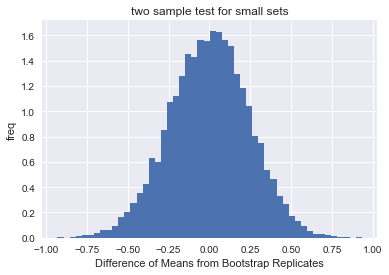

In [108]:
# generate a sample from the normal distribution to test data against
small_norm_sample=np.random.normal(98.6,sigma,10)
small_norm_sample=pd.Series(small_norm_sample)

#find empiriacal difference of means from data and sample
empirical_diff_means = np.mean(small_sample)-np.mean(small_norm_sample)

#join data together and find combined mean
small_sample=pd.Series(small_sample)
small_forces_concat=small_sample.append(small_norm_sample)
small_mean_force = np.mean(small_forces_concat)

# Generate shifted arrays
small_norm_sample_shifted = small_norm_sample - np.mean(small_norm_sample) + small_mean_force
small_sample_shifted = small_sample - np.mean(small_sample) + small_mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(small_norm_sample_shifted, np.mean, 10000)
bs_replicates_b = draw_bs_reps(small_sample_shifted, np.mean,10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates<=empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[2.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'two sample test for small sets')
print("empirical difference in means", empirical_diff_means)
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'Difference of Means from Bootstrap Replicates')
_ = plt.ylabel('freq')
_ = plt.title('two sample test for small sets')

# Show the plot
plt.show()

The two sample also falls to reject the null hypothesis. Note, repeated iterations get a range of results both accepting and rejecting. This is caused by the smaller sample size and range of values in the data set. 

Another look not using bootstrapping:

In [84]:
np.mean(small_sample)

98.17

In [86]:
#calculates p value of small sample mean compared to a population mean of 98.6
stats.norm.cdf(z_number(98.6,1,np.mean(small_sample),np.std(small_sample),10))

0.086949872541851159

In [88]:
# calculate 95% condfidence level
left_interval_z= np.mean(small_sample) - (1.65*(np.std(small_sample)))
right_interval_z= np.mean(small_sample) + (1.65*(np.std(small_sample)))
print"[",left_interval_z,right_interval_z,"]", "95% CI"

[ 97.1937073953 99.1462926047 ] 95% CI


In [90]:
#calculates one sample t test of data set compared to assumed 98.6 mean returns t table value and p value 
stats.ttest_1samp(small_sample, 98.6)

Ttest_1sampResult(statistic=-2.1801865442225541, pvalue=0.057157108476455311)

In [92]:
left_interval_t = np.mean(small_sample)-(1.65*(np.std(small_sample)/np.sqrt(10)))
right_interval_t = np.mean(small_sample)+(1.65*(np.std(small_sample)/np.sqrt(10)))
print"[",left_interval_t,right_interval_t,"]", "95% CI"

[ 97.8612691706 98.4787308294 ] 95% CI


## 5.) At what temperature should we consider someone's temperature to be "abnormal"?
Start by computing the margin of error and confidence interval.

In [93]:
#calculate the margin of error
t_critical = stats.t.ppf(q = 0.99, df=129) # finds score based of of desired confidence 95% 
margin_of_error = t_critical * (sigma/np.sqrt(130))
print("margin of error:")
print(margin_of_error)

margin of error:
0.150891908294


In [94]:
# calculate the 99% confidence interval 
left_interval_t = mu-(t_critical*(sigma/np.sqrt(130)))
right_interval_t = mu+(t_critical*(sigma/np.sqrt(130)))
print"[",left_interval_t,right_interval_t,"]", "99% CI"

[ 98.0983388609 98.4001226775 ] 99% CI


Based off of our data, we would consider any temperature outside the 99% confidence interval to be abnormal. This gives us all data points outside three standard deviations. Temperatures below 98.1(F) or above 98.4(F) should be considered abnormal.

 ## 6.) Is there a significant difference between males and females in normal temperature?
What test did you use and why?
Write a story with your conclusion in the context of the original problem.

We will use the two sample test t test and bootstrap. We have two sample sets that we can compare, so the two sample test is preferred  over the one sample. We choose to use the bootstrap over the permutation test, since the versatility of the permutation test is limited to testing if samples come from the same distribution. We use the t test instead of the z test since the populations are both small, 65 observations for each. 

In [95]:
males=df.temperature[df.gender=='M']
females=df.temperature[df.gender=='F']

In [96]:
males.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [97]:
females.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

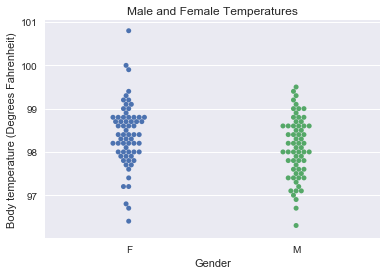

In [98]:
sns.set()
sns.swarmplot(x='gender',y='temperature',data=df,orient='v')
# Label the axes
plt.xlabel('Gender')
plt.ylabel('Body temperature (Degrees Fahrenheit)')
plt.title("Male and Female Temperatures")
# Show the plot
plt.show()

Now to do the two-sample bootstrap test. Same process as before but using the male and female data as our samples.  Once againg we shift both sets to have the same mean. This allows us to simulate the hypothesis that their means are equal. We then draw bootstrap samples out of the shifted sets and compute the difference in means. We draw several bootstrap replicates. The p-value is the fraction of replicates with a difference in means less than or equal to what was observed.

Null Hypothesis: males and females have the same mean human body temperature

Alt Hypothesis: males and females do not have the same mean human body temperature

Assumption: A significance level of 0.05 or 95%

('p-value =', 0.0106)
('95% confidence interval =', array([-0.32769231,  0.25076923]), 'two sample bootstrap test')
('empirical difference in means', -0.289230769230727)


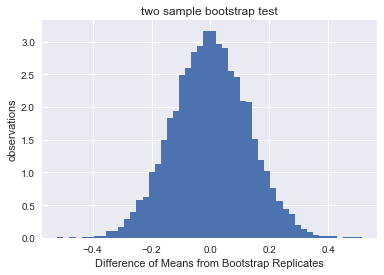

In [104]:
#a two sample bootstrap test

#Compute difference of mean from samples: empirical_diff_means
empirical_diff_means = np.mean(males)-np.mean(females)

# Concatenate forces: forces_concat
forces_concat = np.concatenate((males,females))

# Compute mean of joined sets: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
males_shifted = males - np.mean(males) + mean_force
females_shifted = females - np.mean(females) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_m = draw_bs_reps(males_shifted , np.mean, 10000)
bs_replicates_f = draw_bs_reps(females_shifted , np.mean, 10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_m - bs_replicates_f

# Compute and print p-value: p
p = np.sum(bs_replicates<=empirical_diff_means) / float(len(bs_replicates))
print('p-value =', p)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates,[.5,97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'two sample bootstrap test')
print("empirical difference in means", empirical_diff_means)
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'Difference of Means from Bootstrap Replicates')
_ = plt.ylabel('observations')
_ = plt.title('two sample bootstrap test')

# Show the plot
plt.show()

In [106]:
# two sample t test
stats.ttest_ind(males,females)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

We see that both the two sample bootstrap and two sample t test reject the null hypothesis, that male and female human body temperature means are the same under an assumption of 95% confidence.

The old habit of assuming 98.6 degrees was the average human body temperature is wrong as we have demonstrated. We can also see that male and female body temperatures differ from each other. There have been many advances in both statistics, technology, and medical procedures in the 120 years since Carl Wunderlich first established the standard for human body temperatures. We should reflect upon old held believes(standards) with scrutiny as time passes. When we find such examples as these, we must be willing to update our standards and knowledge. The medical treatment of patients could benefit from more accurate treatment of body temperatures moving outside the range of normal body temperatures. Lives depend upon correcting our understanding of the human body. 

